In [4]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold

# Set seeds to make the experiment more reproducible.
def seed_everything(seed=0):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    
seed = 0
seed_everything(seed)

%matplotlib inline
sns.set(style="whitegrid")
warnings.filterwarnings("ignore")

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
train_df = pd.read_csv('/content/gdrive/My Drive/tesis/aptos/train.csv')
test_df = pd.read_csv('/content/gdrive/My Drive/tesis/aptos/test.csv')
print('Number of train samples: ', train_df.shape[0])
print('Number of test samples: ', test_df.shape[0])
display(train_df.head())

Number of train samples:  3662
Number of test samples:  1928


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [ ]:
train_df['height'] = 0
train_df['width'] = 0
test_df['height'] = 0
test_df['width'] = 0
 
for index, row in train_df.iterrows():
    img = cv2.imread('../input/train_images/%s.png' % row['id_code'], cv2.IMREAD_UNCHANGED)
    train_df.set_value(index, 'height', img.shape[0])
    train_df.set_value(index, 'width', img.shape[1])
    
for index, row in test_df.iterrows():
    img = cv2.imread('../input/test_images/%s.png' % row['id_code'], cv2.IMREAD_UNCHANGED)
    test_df.set_value(index, 'height', img.shape[0])
    test_df.set_value(index, 'width', img.shape[1])
    
display(train_df.head())

In [ ]:
train, validation = train_test_split(train_df, test_size=0.2, random_state=seed)

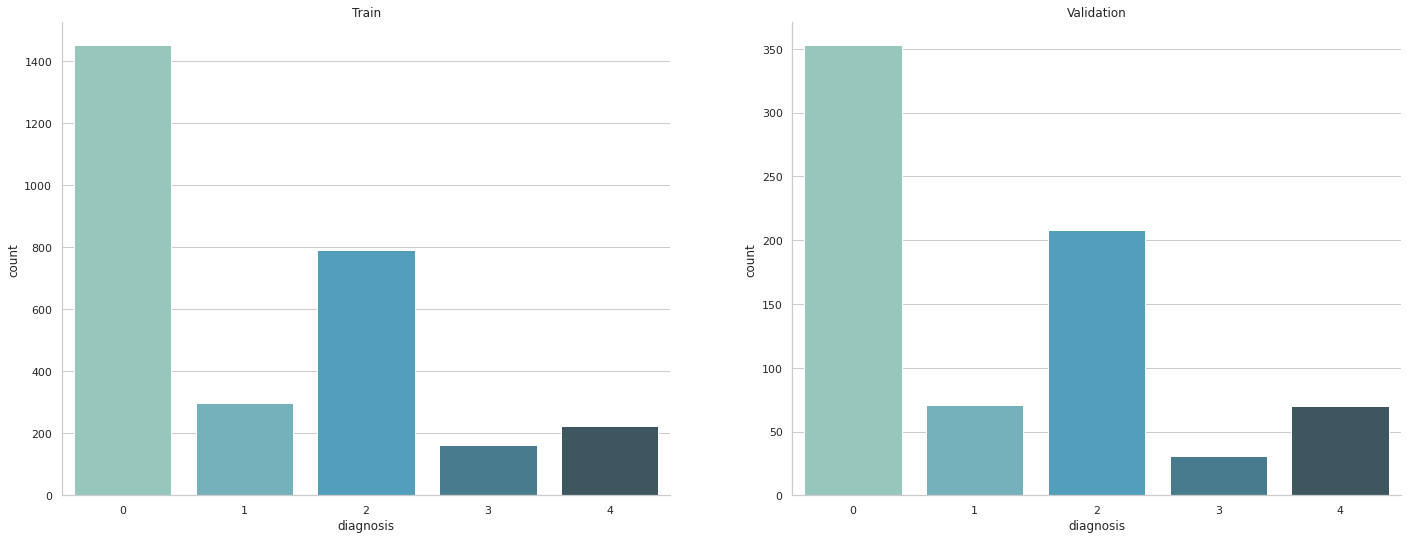

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', figsize=(24, 8.7))
sns.countplot(x="diagnosis", data=train, palette="GnBu_d", ax=ax1).set_title('Train')
sns.countplot(x="diagnosis", data=validation, palette="GnBu_d", ax=ax2).set_title('Validation')
sns.despine()
plt.show()

In [ ]:

train['set'] = 'train'
validation['set'] = 'validation'
train_complete = train.append(validation)
train_complete.head()
train_complete.to_csv('hold-out.csv', index=False)
train_complete.head()

,id_code,diagnosis,set
1236,55eac26bd383,1,train
962,44e0d56e9d42,2,train
2447,aa4407aab872,0,train
2991,cffc50047828,0,train
2559,b0f0fa677d5f,0,train


In [ ]:
folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

for fold_n, (trn_idx, val_idx) in enumerate(folds.split(train_df, train_df['diagnosis'])):
    print('Fold: %s, Train size: %s, Validation size %s' % 
          (fold_n, len(trn_idx), len(val_idx)))
    train_df[('fold_%s' % fold_n)] = 0
    train_df[('fold_%s' % fold_n)].loc[trn_idx] = 'train'
    train_df[('fold_%s' % fold_n)].loc[val_idx] = 'validation'
    
display(train_df.head())

Fold: 0, Train size: 2929, Validation size 733
Fold: 1, Train size: 2929, Validation size 733
Fold: 2, Train size: 2930, Validation size 732
Fold: 3, Train size: 2930, Validation size 732
Fold: 4, Train size: 2930, Validation size 732


,id_code,diagnosis,fold_0,fold_1,fold_2,fold_3,fold_4
0,000c1434d8d7,2,train,train,train,validation,train
1,001639a390f0,4,train,train,train,train,validation
2,0024cdab0c1e,1,validation,train,train,train,train
3,002c21358ce6,0,train,train,train,validation,train
4,005b95c28852,0,validation,train,train,train,train


In [ ]:
train_df.to_csv('5-fold.csv', index=False)
train_df.head()

,id_code,diagnosis,fold_0,fold_1,fold_2,fold_3,fold_4
0,000c1434d8d7,2,train,train,train,validation,train
1,001639a390f0,4,train,train,train,train,validation
2,0024cdab0c1e,1,validation,train,train,train,train
3,002c21358ce6,0,train,train,train,validation,train
4,005b95c28852,0,validation,train,train,train,train


In [6]:
train_df = pd.read_csv('/content/gdrive/My Drive/tesis2/5-fold.csv')

In [ ]:
train_df.to_csv('/content/gdrive/My Drive/tesis2/5-fold.csv')

In [7]:
train_df.head(10)

,Unnamed: 0,id_code,diagnosis,fold_0,fold_1,fold_2,fold_3,fold_4
0,0,000c1434d8d7,2,train,train,train,validation,train
1,1,001639a390f0,4,train,train,train,train,validation
2,2,0024cdab0c1e,1,validation,train,train,train,train
3,3,002c21358ce6,0,train,train,train,validation,train
4,4,005b95c28852,0,validation,train,train,train,train
5,5,0083ee8054ee,4,train,train,validation,train,train
6,6,0097f532ac9f,0,validation,train,train,train,train
7,7,00a8624548a9,2,validation,train,train,train,train
8,8,00b74780d31d,2,train,train,train,train,validation
9,9,00cb6555d108,1,train,validation,train,train,train


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3662 non-null   int64 
 1   id_code     3662 non-null   object
 2   diagnosis   3662 non-null   int64 
 3   fold_0      3662 non-null   object
 4   fold_1      3662 non-null   object
 5   fold_2      3662 non-null   object
 6   fold_3      3662 non-null   object
 7   fold_4      3662 non-null   object
dtypes: int64(2), object(6)
memory usage: 229.0+ KB


In [9]:
x_train = np.load('/content/gdrive/My Drive/tesis/aptos/train224.npy')

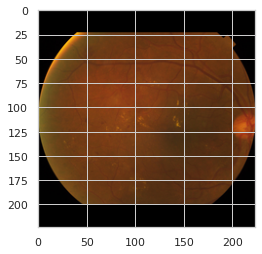

In [10]:
plt.imshow(x_train[0])

In [11]:
train_df['diagnosis']

0       2
1       4
2       1
3       0
4       0
       ..
3657    2
3658    0
3659    2
3660    0
3661    2
Name: diagnosis, Length: 3662, dtype: int64

In [12]:
fold2=pd.get_dummies(train_df['fold_2']).values

In [13]:
fold2[0]

array([1, 0], dtype=uint8)

In [14]:
X_train = train_df[train_df['fold_2'] == 'train']
X_val = train_df[train_df['fold_2'] == 'validation']

In [15]:
X_train[:20]

,Unnamed: 0,id_code,diagnosis,fold_0,fold_1,fold_2,fold_3,fold_4
0,0,000c1434d8d7,2,train,train,train,validation,train
1,1,001639a390f0,4,train,train,train,train,validation
2,2,0024cdab0c1e,1,validation,train,train,train,train
3,3,002c21358ce6,0,train,train,train,validation,train
4,4,005b95c28852,0,validation,train,train,train,train
6,6,0097f532ac9f,0,validation,train,train,train,train
7,7,00a8624548a9,2,validation,train,train,train,train
8,8,00b74780d31d,2,train,train,train,train,validation
9,9,00cb6555d108,1,train,validation,train,train,train
10,10,00cc2b75cddd,0,train,train,train,train,validation


In [26]:
y_train1[:20]

array([[0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

In [17]:
x_train_i =np.array(X_train.index)

In [18]:
x_val_i = np.array(X_val.index)

In [19]:
x_train_i

array([   0,    1,    2, ..., 3658, 3660, 3661])

In [20]:
x_train.shape

(3662, 224, 224, 3)

In [25]:
x_val_i.shape

(732,)

In [22]:
y_train = pd.get_dummies(train_df['diagnosis']).values

In [23]:
y_train.shape

(3662, 5)

In [27]:
x_train1 = np.empty((2930,224,224,3),dtype='uint8')
x_val1 = np.empty((732,224,224,3),dtype='uint8')

y_train1 =  np.empty((2930,5),dtype='uint8')
y_val1 = np.empty((732,5),dtype='uint8')

for i in range(len(x_train_i)):
  x_train1[i] = x_train[x_train_i[i]]
  y_train1[i] = y_train[x_train_i[i]]

for j in range(len(x_val_i)):
  x_val1[j] = x_train[x_val_i[j]]
  y_val1[j] = y_train[x_val_i[j]]

In [28]:
y_val1[:20]

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0]], dtype=uint8)

In [29]:
X_val[:20]

,Unnamed: 0,id_code,diagnosis,fold_0,fold_1,fold_2,fold_3,fold_4
5,5,0083ee8054ee,4,train,train,validation,train,train
17,17,014508ccb9cb,0,train,train,validation,train,train
19,19,0161338f53cc,2,train,train,validation,train,train
23,23,01c7808d901d,2,train,train,validation,train,train
24,24,01d9477b1171,0,train,train,validation,train,train
26,26,01f7bb8be950,0,train,train,validation,train,train
27,27,0212dd31f623,0,train,train,validation,train,train
34,34,02685f13cefd,4,train,train,validation,train,train
42,42,033f2b43de6d,2,train,train,validation,train,train
43,43,034cb07a550f,4,train,train,validation,train,train


In [30]:
print(x_train1.shape)
print(x_val1.shape)
print(y_train1.shape)
print(y_val1.shape)

(2930, 224, 224, 3)
(732, 224, 224, 3)
(2930, 5)
(732, 5)


In [31]:
import json
import math
import os

import cv2
from PIL import Image
import numpy as np
from keras import layers
from keras.applications import DenseNet121
#from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy
import tensorflow as tf
from tensorflow.keras.callbacks import Callback, ModelCheckpoint
from tqdm import tqdm

In [32]:
BATCH_SIZE = 16

train_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

val_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)

test_datagen = ImageDataGenerator(rescale=1./ 255.,
                                   rotation_range=360,                               
                                   #shear_range=0.01,
                                   zoom_range=[0.9, 1.25],
                                   horizontal_flip=True,
                                   vertical_flip=True)


In [33]:
data_generator = train_datagen.flow(x_train1, y_train1, batch_size=BATCH_SIZE, seed=2020)
vdata_gen =  test_datagen.flow(x_val1, y_val1, batch_size=BATCH_SIZE, seed=2020)

In [34]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation
from keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from keras.layers import Input,GlobalAveragePooling2D,Dropout,Dense,Activation
from keras import applications
from keras import optimizers,Model,Sequential

In [35]:
pip install -U efficientnet

     |████████████████████████████████| 51kB 4.5MB/s 


In [36]:
def cosine_decay_with_warmup(global_step,
                             learning_rate_base,
                             total_steps,
                             warmup_learning_rate=0.0,
                             warmup_steps=0,
                             hold_base_rate_steps=0):
    

    if total_steps < warmup_steps:
        raise ValueError('total_steps must be larger or equal to warmup_steps.')
    learning_rate = 0.5 * learning_rate_base * (1 + np.cos(
        np.pi *
        (global_step - warmup_steps - hold_base_rate_steps
         ) / float(total_steps - warmup_steps - hold_base_rate_steps)))
    if hold_base_rate_steps > 0:
        learning_rate = np.where(global_step > warmup_steps + hold_base_rate_steps,
                                 learning_rate, learning_rate_base)
    if warmup_steps > 0:
        if learning_rate_base < warmup_learning_rate:
            raise ValueError('learning_rate_base must be larger or equal to warmup_learning_rate.')
        slope = (learning_rate_base - warmup_learning_rate) / warmup_steps
        warmup_rate = slope * global_step + warmup_learning_rate
        learning_rate = np.where(global_step < warmup_steps, warmup_rate,
                                 learning_rate)
        return np.where(global_step > total_steps, 0.0, learning_rate)

class WarmUpCosineDecayScheduler(Callback):
    

    def __init__(self,
                 learning_rate_base,
                 total_steps,
                 global_step_init=0,
                 warmup_learning_rate=0.0,
                 warmup_steps=0,
                 hold_base_rate_steps=0,
                 verbose=0):
        

        super(WarmUpCosineDecayScheduler, self).__init__()
        self.learning_rate_base = learning_rate_base
        self.total_steps = total_steps
        self.global_step = global_step_init
        self.warmup_learning_rate = warmup_learning_rate
        self.warmup_steps = warmup_steps
        self.hold_base_rate_steps = hold_base_rate_steps
        self.verbose = verbose
        self.learning_rates = []

    def on_batch_end(self, batch, logs=None):
        self.global_step = self.global_step + 1
        lr = K.get_value(self.model.optimizer.lr)
        self.learning_rates.append(lr)

    def on_batch_begin(self, batch, logs=None):
        lr = cosine_decay_with_warmup(global_step=self.global_step,
                                      learning_rate_base=self.learning_rate_base,
                                      total_steps=self.total_steps,
                                      warmup_learning_rate=self.warmup_learning_rate,
                                      warmup_steps=self.warmup_steps,
                                      hold_base_rate_steps=self.hold_base_rate_steps)
        K.set_value(self.model.optimizer.lr, lr)
        if self.verbose > 0:
            print('\nBatch %02d: setting learning rate to %s.' % (self.global_step + 1, lr))

In [37]:
import efficientnet.keras as efn 

In [38]:
def create_model(input_shape, n_out):
    input_tensor = Input(shape=input_shape)
    base_model = efn.EfficientNetB5(weights='imagenet',include_top=False,input_tensor=input_tensor)
    #base_model = applications.ResNet50(weights='imagenet', include_top=False,input_tensor=input_tensor)
    #base_model.load_weights('resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5')

    x = GlobalAveragePooling2D()(base_model.output)
    x = Dropout(0.5)(x)
    x = Dense(2048, activation='relu')(x)
    x = Dropout(0.5)(x)
    final_output = Dense(n_out, activation='softmax', name='final_output')(x)
    model = Model(input_tensor, final_output)
    return model

In [39]:
model = create_model(input_shape=(224, 224, 3), n_out=5)

for layer in model.layers:
    layer.trainable = False

for i in range(-2, 0):
    model.layers[i].trainable = True
model.summary()

115515392/115515256 [==============================] - 4s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 48) 192         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 48) 0           stem_bn[0][0]                    
____________________

In [40]:
FACTOR = 4
WARMUP_LEARNING_RATE = 1e-3 * FACTOR
STEP_SIZE = len(x_train1) // BATCH_SIZE
WARMUP_EPOCHS = 5
TOTAL_STEPS_1st = WARMUP_EPOCHS * STEP_SIZE
LR_WARMUP_EPOCHS_1st = 2
WARMUP_STEPS_1st = LR_WARMUP_EPOCHS_1st * STEP_SIZE

In [41]:
cosine_lr_1st = WarmUpCosineDecayScheduler(learning_rate_base=WARMUP_LEARNING_RATE,
                                           total_steps=TOTAL_STEPS_1st,
                                           warmup_learning_rate=0.0,
                                           warmup_steps=WARMUP_STEPS_1st,
                                           hold_base_rate_steps=(2 * STEP_SIZE))

In [42]:
callback_list = [cosine_lr_1st]

In [43]:
from keras import backend as K

In [44]:
model.compile(optimizer = optimizers.Adam(lr=WARMUP_LEARNING_RATE),loss = 'categorical_crossentropy',metrics = ['accuracy'])

history_warmup = model.fit(data_generator,
                                     validation_data=vdata_gen,
                                     epochs=5,
                                     callbacks=callback_list,
                                     verbose=1)

Epoch 1/5
184/184 [==============================] - 41s 222ms/step - loss: 1.2465 - accuracy: 0.5232 - val_loss: 0.9337 - val_accuracy: 0.6749
Epoch 2/5
184/184 [==============================] - 38s 204ms/step - loss: 1.0427 - accuracy: 0.6242 - val_loss: 0.8959 - val_accuracy: 0.6516
Epoch 3/5
184/184 [==============================] - 38s 206ms/step - loss: 1.0772 - accuracy: 0.6130 - val_loss: 0.8418 - val_accuracy: 0.6926
Epoch 4/5
184/184 [==============================] - 37s 204ms/step - loss: 1.1538 - accuracy: 0.6010 - val_loss: 0.8317 - val_accuracy: 0.6749
Epoch 5/5
184/184 [==============================] - 37s 201ms/step - loss: 1.0658 - accuracy: 0.6338 - val_loss: 0.8037 - val_accuracy: 0.6913


In [45]:
TOTAL_STEPS_2nd = 20 * STEP_SIZE
LR_WARMUP_EPOCHS_2nd = 5
WARMUP_STEPS_2nd = LR_WARMUP_EPOCHS_2nd * STEP_SIZE
LEARNING_RATE = 0.001

In [46]:
cosine_lr_2nd = WarmUpCosineDecayScheduler(learning_rate_base=LEARNING_RATE,
                                           total_steps=TOTAL_STEPS_2nd,
                                           warmup_learning_rate=0.0,
                                           warmup_steps=WARMUP_STEPS_2nd,
                                           hold_base_rate_steps=(2 * STEP_SIZE))

In [47]:
for layer in model.layers:
    layer.trainable = True

ES_PATIENCE = 5
RLROP_PATIENCE = 3
DECAY_DROP = 0.5


es = EarlyStopping(monitor='val_loss', mode='min', patience=ES_PATIENCE, restore_best_weights=True, verbose=1)
rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', patience=RLROP_PATIENCE, factor=DECAY_DROP, min_lr=1e-6, verbose=1)

callback_list = [es, cosine_lr_2nd]

optimizer = optimizers.Adam(lr=LEARNING_RATE)
model.compile(optimizer=optimizer, loss="categorical_crossentropy",  metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
stem_conv (Conv2D)              (None, 112, 112, 48) 1296        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn (BatchNormalization)    (None, 112, 112, 48) 192         stem_conv[0][0]                  
__________________________________________________________________________________________________
stem_activation (Activation)    (None, 112, 112, 48) 0           stem_bn[0][0]                    
_______________________________________________________________________________________

In [48]:
model.fit(data_generator, epochs=20, validation_data=vdata_gen,callbacks=[callback_list])

Epoch 1/20
184/184 [==============================] - 54s 296ms/step - loss: 1.0761 - accuracy: 0.6068 - val_loss: 0.8200 - val_accuracy: 0.7281
Epoch 2/20
184/184 [==============================] - 52s 280ms/step - loss: 0.8358 - accuracy: 0.7089 - val_loss: 0.6295 - val_accuracy: 0.7596
Epoch 3/20
184/184 [==============================] - 51s 278ms/step - loss: 0.7961 - accuracy: 0.7195 - val_loss: 0.6562 - val_accuracy: 0.7145
Epoch 4/20
184/184 [==============================] - 51s 279ms/step - loss: 0.7191 - accuracy: 0.7502 - val_loss: 0.5603 - val_accuracy: 0.7883
Epoch 5/20
184/184 [==============================] - 51s 279ms/step - loss: 0.6748 - accuracy: 0.7519 - val_loss: 0.6603 - val_accuracy: 0.7514
Epoch 6/20
184/184 [==============================] - 51s 278ms/step - loss: 0.6045 - accuracy: 0.7700 - val_loss: 0.5905 - val_accuracy: 0.7842
Epoch 7/20
184/184 [==============================] - 51s 279ms/step - loss: 0.6582 - accuracy: 0.7625 - val_loss: 0.5170 - val_ac

In [49]:
vdata_gencomplete =  test_datagen.flow(x_val1, y_val1, batch_size=1, seed=2020)

In [61]:
y_val2 = np.array([[0,0,0,0,0]])


for i in range(732):
  y_val2 =np.append(y_val2, vdata_gencomplete[i][1], axis=0)

y_val2 = np.delete(y_val2,0, axis=0)

In [62]:
y_val12 = [np.argmax(pred1) for pred1 in y_val2]

In [63]:
val_preds = model.predict(vdata_gencomplete,verbose = 1)

732/732 [==============================] - 13s 18ms/step


In [64]:
val_preds1 = [np.argmax(pred) for pred in val_preds]

In [65]:
print("Val Cohen Kappa score: %.3f" % cohen_kappa_score(val_preds1, y_val12, weights='quadratic'))

Val Cohen Kappa score: 0.900


In [66]:
model.save_weights('/content/gdrive/My Drive/tesis2/effNetB5_fold2.h5')